**EXPLORATORY DATA ANALYSIS (EDA) ON RETAIL SALES DATA**

**Table of Contents**

->Introduction

->Overview of the Project

->Data Collection and Preparation

->Data Cleaning and Preprocessing

->Exploratory Data Analysis

->Ethical Considerations and Data Privacy

->Future Directions and Further Research

->Conclusion

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/retail_sales_dataset.csv')

In [3]:
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [5]:
print(data.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [6]:
print(data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
data.fillna(method='ffill', inplace=True)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [10]:
print("\nDescriptive statistics for specific numerical columns:")
print("Mean values:")
print(data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mean())
print("\nMedian values:")
print(data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].median())
print("\nStandard deviation values:")
print(data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].std())

print("\nMode values for numerical and categorical columns:")
print(data[['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Gender', 'Product Category']].mode().iloc[0])



Descriptive statistics for specific numerical columns:
Mean values:
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median values:
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Standard deviation values:
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64

Mode values for numerical and categorical columns:
Age                       43
Quantity                 4.0
Price per Unit          50.0
Total Amount            50.0
Gender                Female
Product Category    Clothing
Name: 0, dtype: object


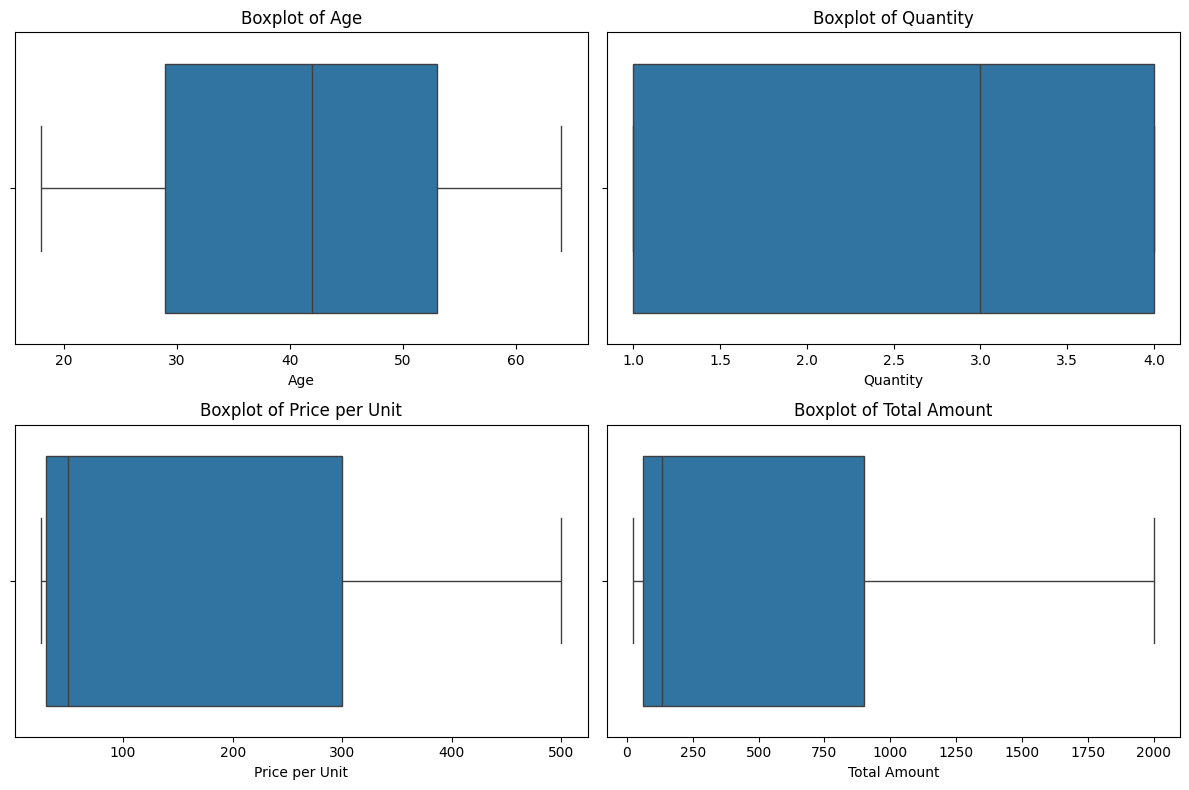

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()

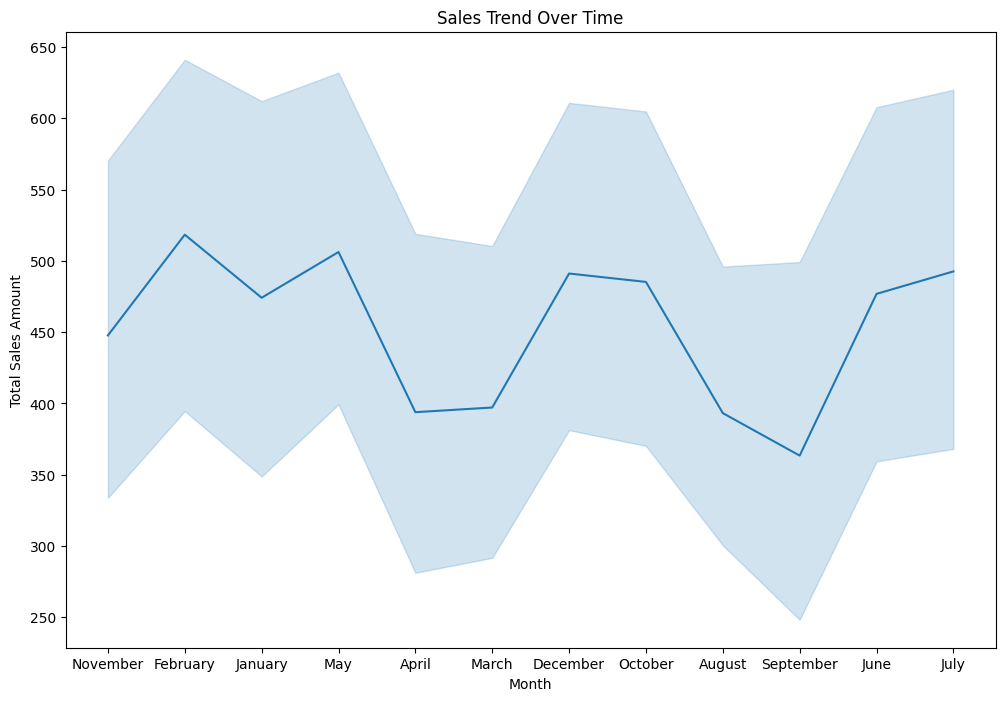

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Total Amount', data=data)
plt.title('Sales Trend Over Time', fontsize=12)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Total Sales Amount', fontsize=10)
plt.show()

In [14]:
transaction_count = data.groupby('Month')['Transaction ID'].count()

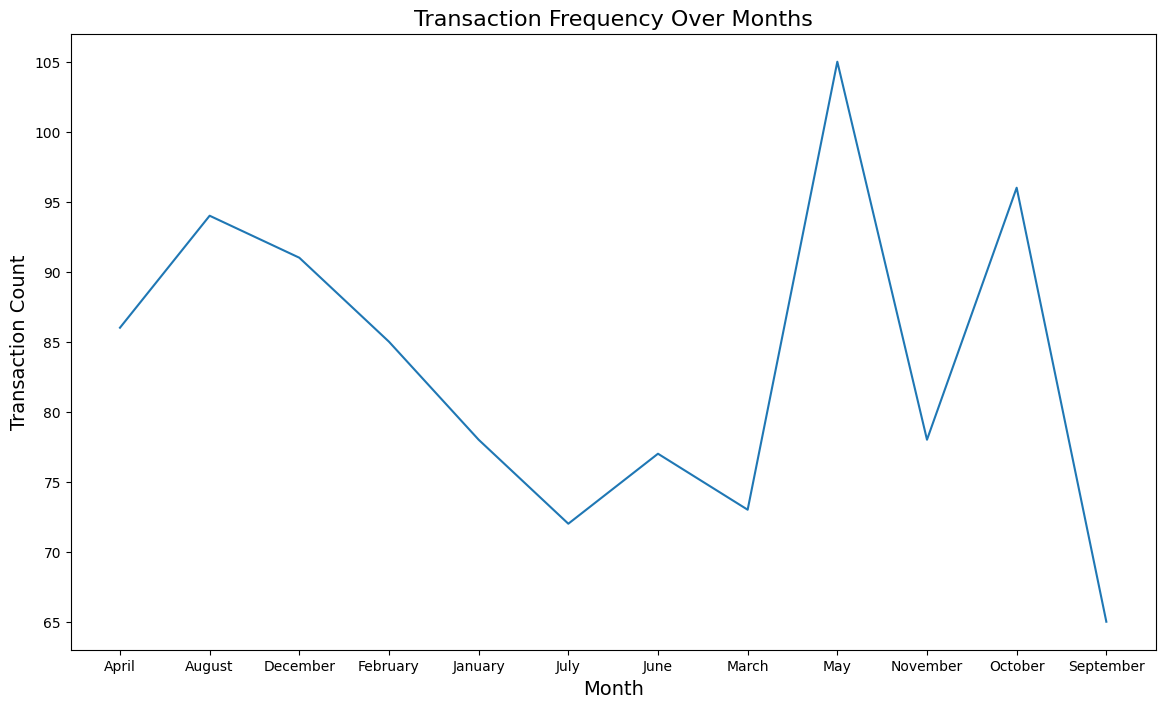

In [15]:
plt.figure(figsize=(14, 8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

In [16]:
heatmap = data.pivot_table(index='Month', columns='Product Category', values='Total Amount')

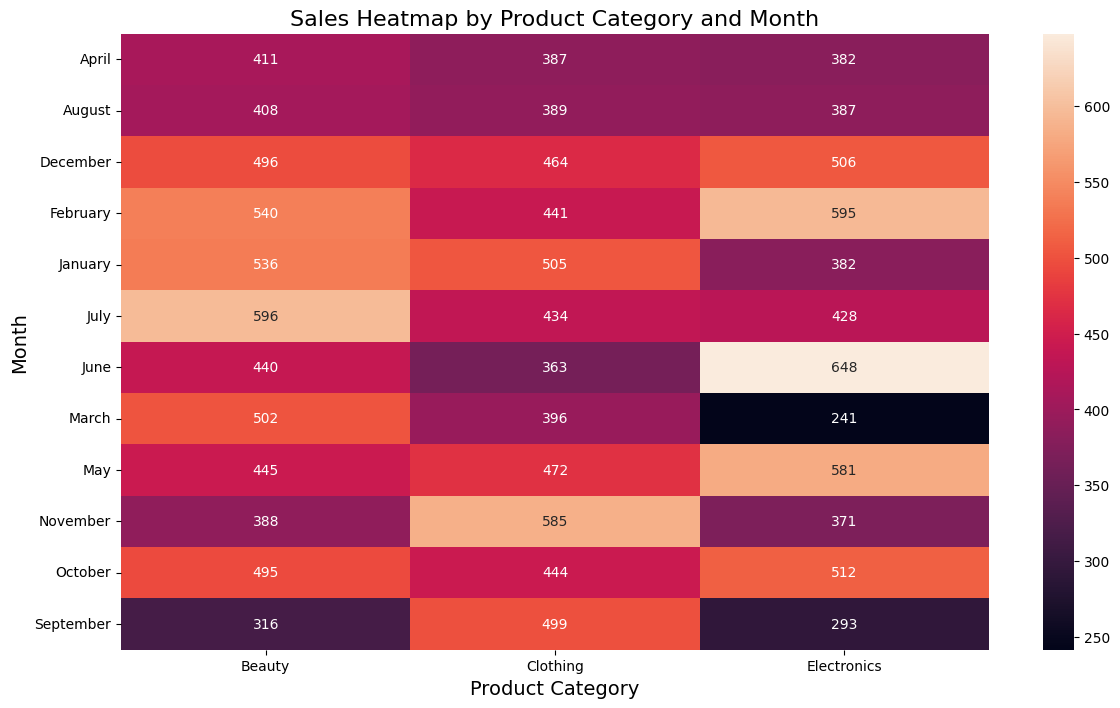

In [17]:
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap by Product Category and Month', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()

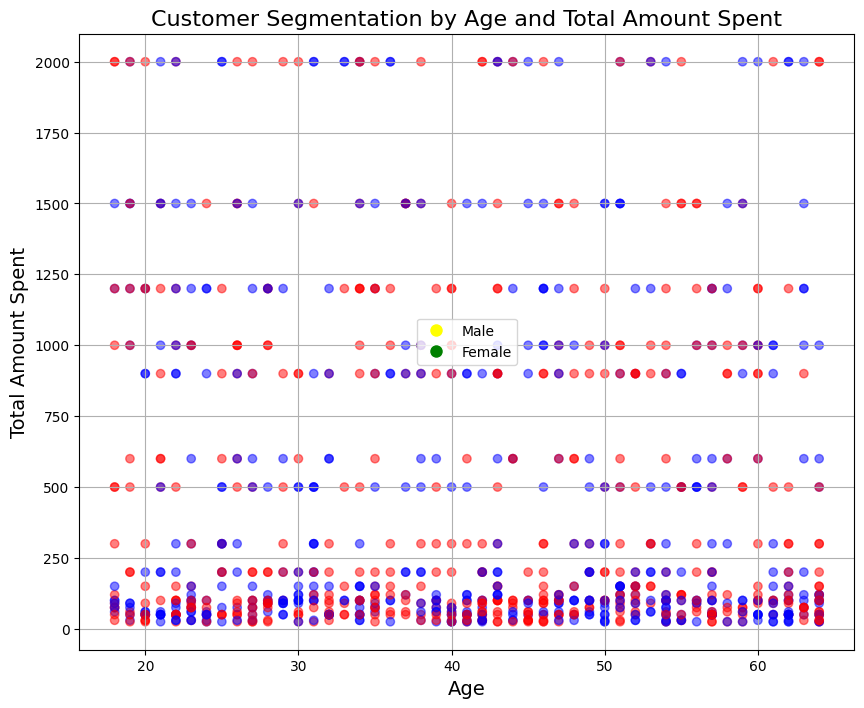

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Age'], data['Total Amount'], alpha=0.5, c=data['Gender'].map({'Male': 'blue', 'Female': 'red'}))
plt.title('Customer Segmentation by Age and Total Amount Spent', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Total Amount Spent', fontsize=14)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Male'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Female')])
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

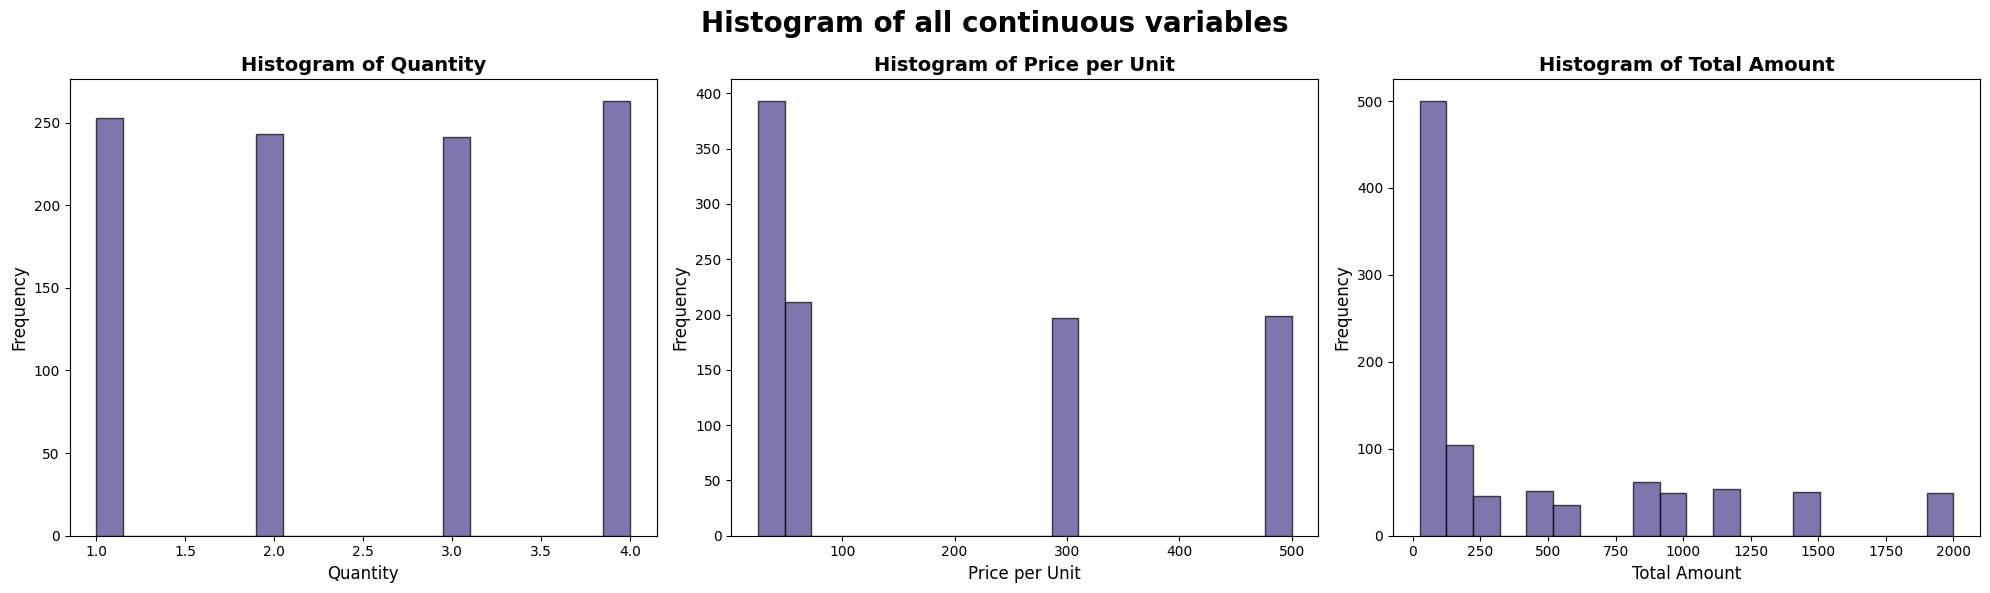

In [23]:
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

axs[0].hist(data['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[0].set_title('Histogram of Quantity', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Quantity', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

axs[1].hist(data['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[1].set_title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Price per Unit', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

axs[2].hist(data['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
axs[2].set_title('Histogram of Total Amount', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Total Amount', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

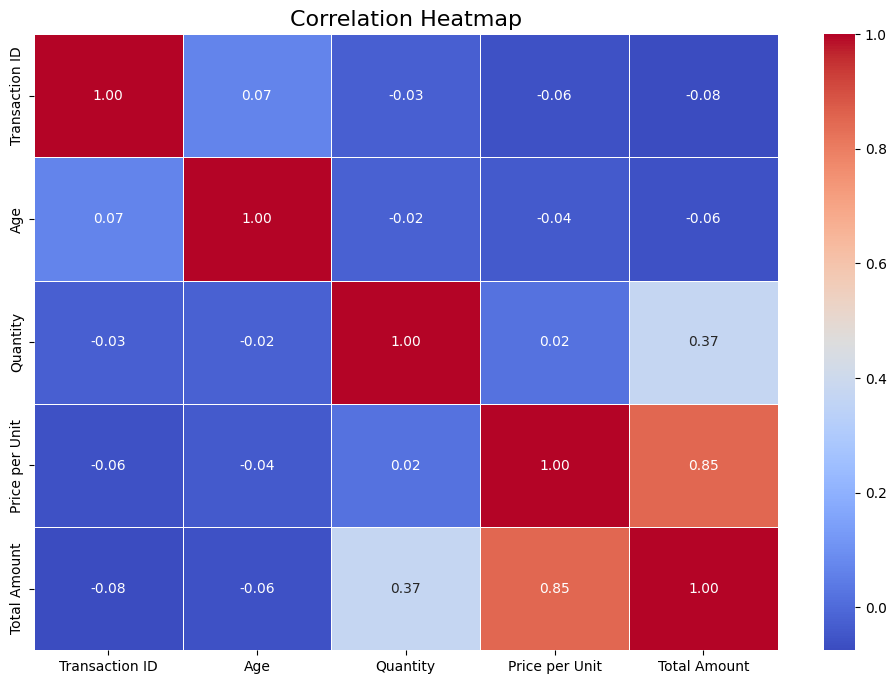

In [21]:
numeric_data = data.select_dtypes(include=[np.number])

correlation = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [27]:
print(data.columns)
print(data.dtypes)


Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount', 'Month'],
      dtype='object')
Transaction ID       int64
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
Month               object
dtype: object


In [29]:
data.columns = data.columns.str.strip()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Transaction ID': range(1, 11),
    'Customer ID': ['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005', 'CUST006', 'CUST007', 'CUST008', 'CUST009', 'CUST010'],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F'],
    'Age': [25, 34, 45, 23, 31, 40, 28, 35, 50, 29],
    'Product Category': ['Electronics', 'Clothing', 'Clothing', 'Groceries', 'Electronics', 'Groceries', 'Groceries', 'Clothing', 'Electronics', 'Clothing'],
    'Quantity': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Price per Unit': [100, 50, 30, 20, 200, 10, 15, 25, 150, 40],
    'Total Amount': [100, 100, 90, 80, 1000, 60, 105, 200, 1350, 400],
    'Month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10']
})

data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')

In [33]:
monthly_sales = data.groupby('Month')['Total Amount'].sum().reset_index()

In [34]:
monthly_sales = monthly_sales.sort_values(by='Month')

In [35]:
monthly_sales['Sales_Moving_Avg'] = monthly_sales['Total Amount'].rolling(window=3).mean()

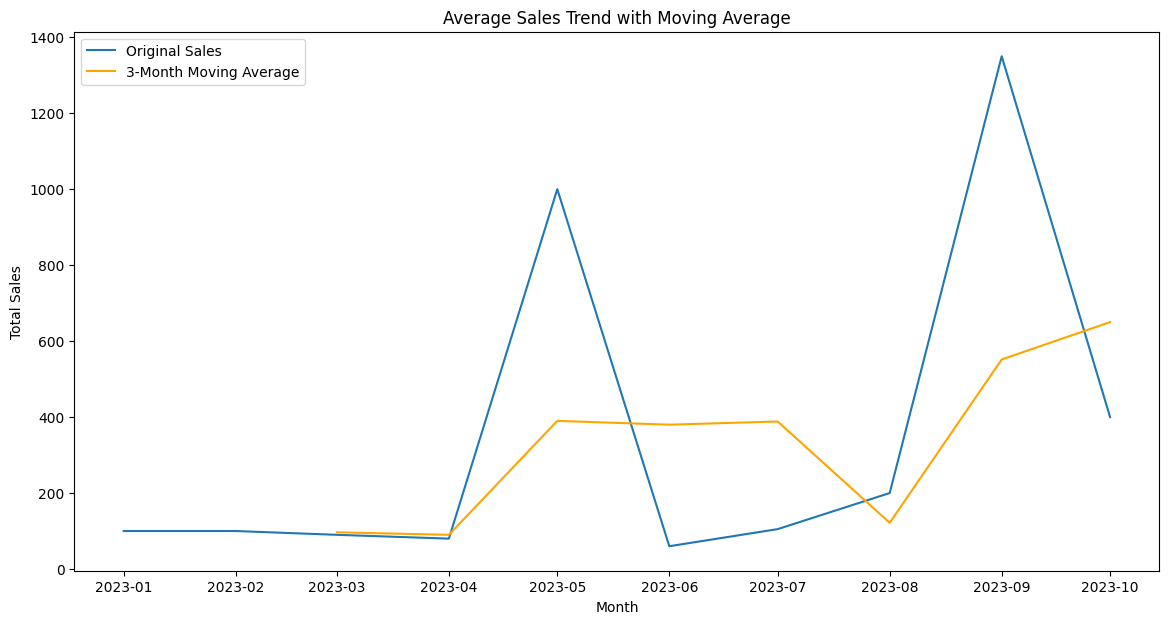

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['Month'], monthly_sales['Total Amount'], label='Original Sales')
plt.plot(monthly_sales['Month'], monthly_sales['Sales_Moving_Avg'], label='3-Month Moving Average', color='orange')
plt.title('Average Sales Trend with Moving Average')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Creating a sample dataset with 30 months of data
np.random.seed(0)
date_rng = pd.date_range(start='2021-01-01', end='2023-06-01', freq='MS')
monthly_sales = pd.DataFrame(date_rng, columns=['Month'])
monthly_sales['Total Amount'] = np.random.randint(1000, 5000, size=(len(date_rng)))

# Ensure 'Month' column is in datetime format
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'], format='%Y-%m')

# Set the 'Month' column as the index
monthly_sales.set_index('Month', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales['Total Amount'], model='additive', period=12)

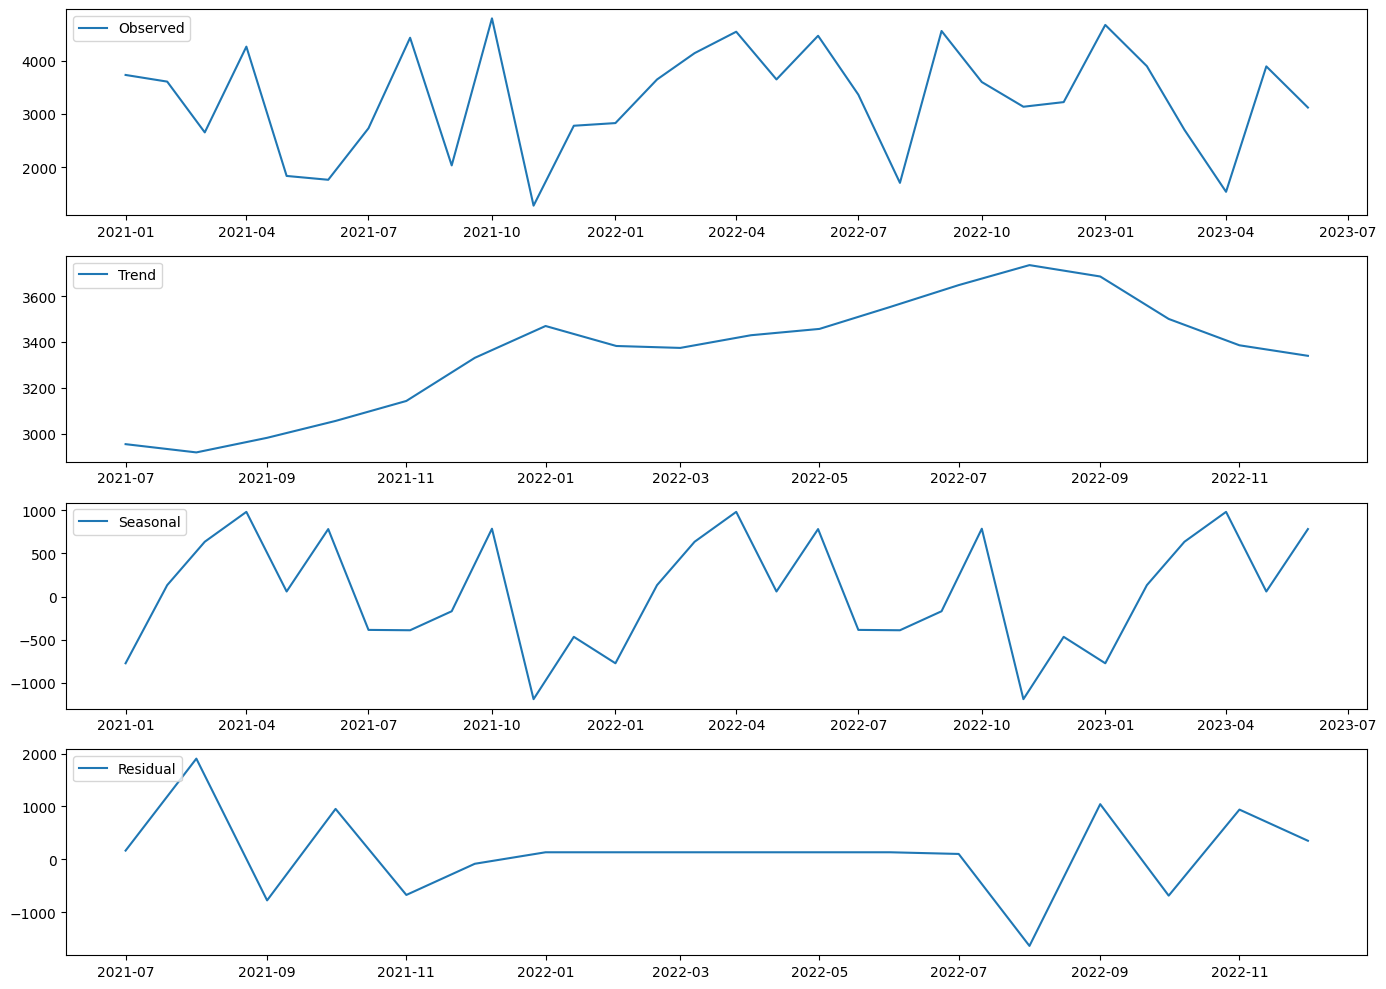

In [42]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [43]:
data = pd.DataFrame({
    'Transaction ID': range(1, 101),
    'Customer ID': [f'CUST{str(i).zfill(3)}' for i in range(1, 101)],
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Age': np.random.randint(18, 70, size=100),
    'Product Category': np.random.choice(['Electronics', 'Clothing', 'Grocery', 'Furniture'], size=100),
    'Quantity': np.random.randint(1, 10, size=100),
    'Price per Unit': np.random.randint(10, 500, size=100),
    'Total Amount': np.random.randint(10, 500, size=100) * np.random.randint(1, 10, size=100),
    'Month': pd.date_range(start='2022-01-01', periods=100, freq='M')
})

In [44]:
gender_counts = data['Gender'].value_counts()

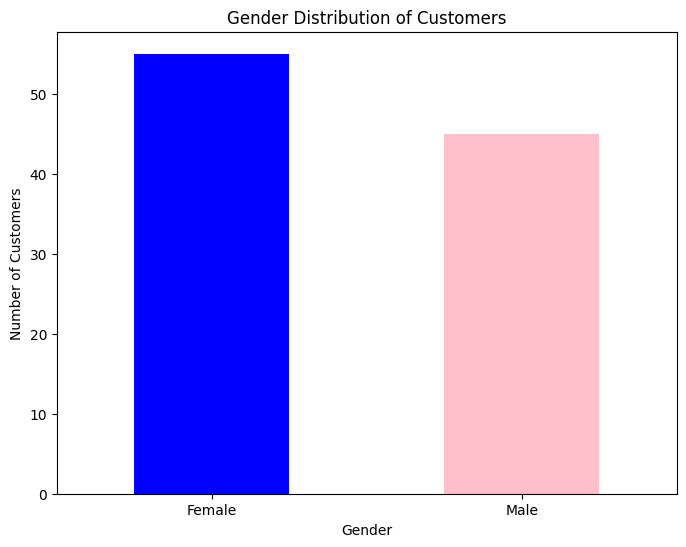

In [45]:
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

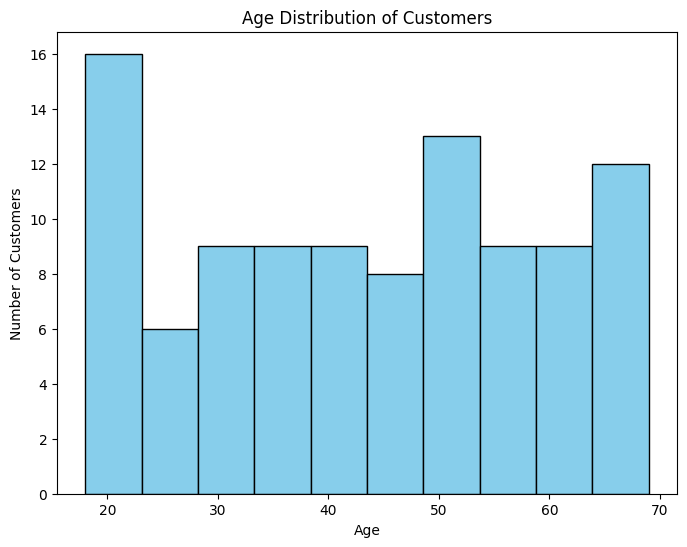

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [48]:
product_sales = data.groupby('Product Category')['Total Amount'].sum()

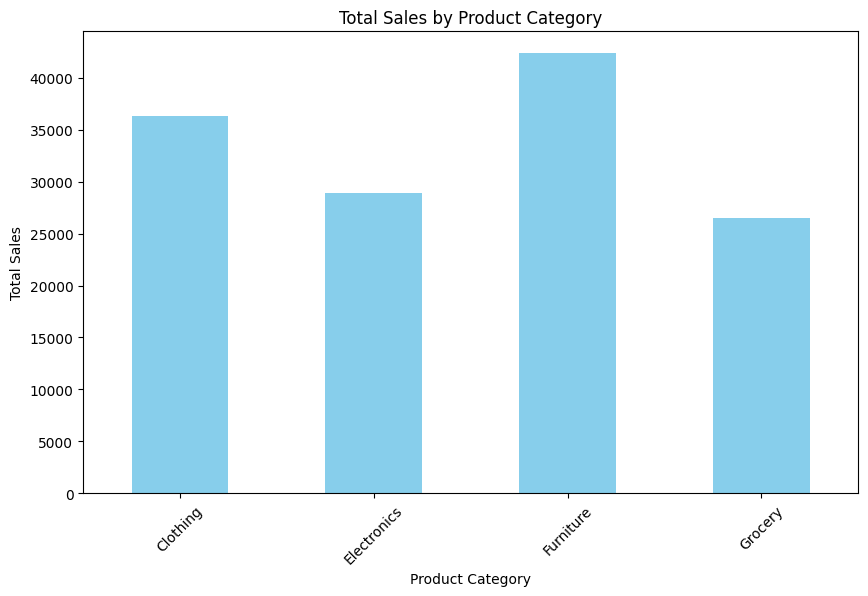

In [49]:
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



In [50]:
product_quantity = data.groupby('Product Category')['Quantity'].sum()

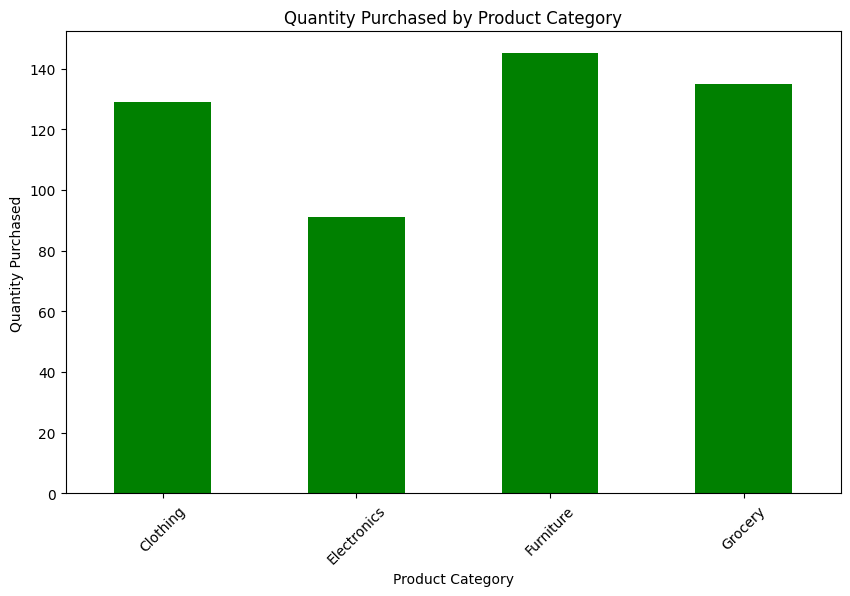

In [51]:
plt.figure(figsize=(10, 6))
product_quantity.plot(kind='bar', color='green')
plt.title('Quantity Purchased by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Purchased')
plt.xticks(rotation=45)
plt.show()

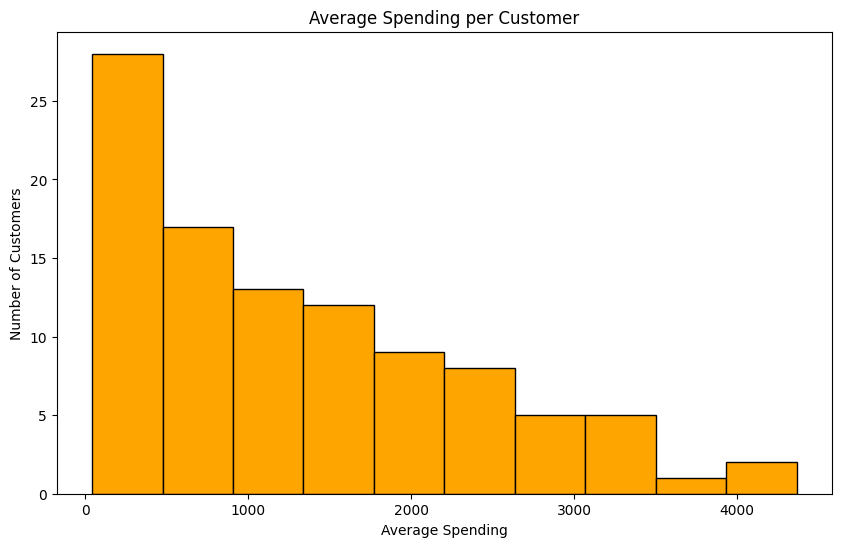

In [52]:
avg_spending_per_customer = data.groupby('Customer ID')['Total Amount'].mean()

plt.figure(figsize=(10, 6))
avg_spending_per_customer.plot(kind='hist', bins=10, color='orange', edgecolor='black')
plt.title('Average Spending per Customer')
plt.xlabel('Average Spending')
plt.ylabel('Number of Customers')
plt.show()

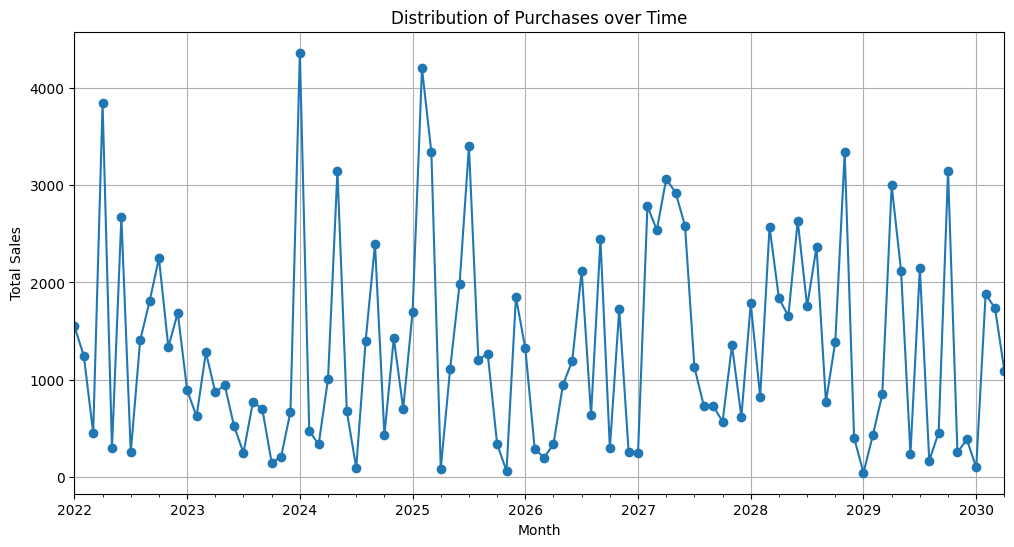

In [53]:
data['Month'] = pd.to_datetime(data['Month'])
monthly_sales = data.groupby(data['Month'].dt.to_period('M'))['Total Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Distribution of Purchases over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [54]:
data['Month'] = pd.to_datetime(data['Month'])

monthly_sales = data.groupby(data['Month'].dt.to_period('M'))['Total Amount'].sum()

cumulative_sales = monthly_sales.cumsum()

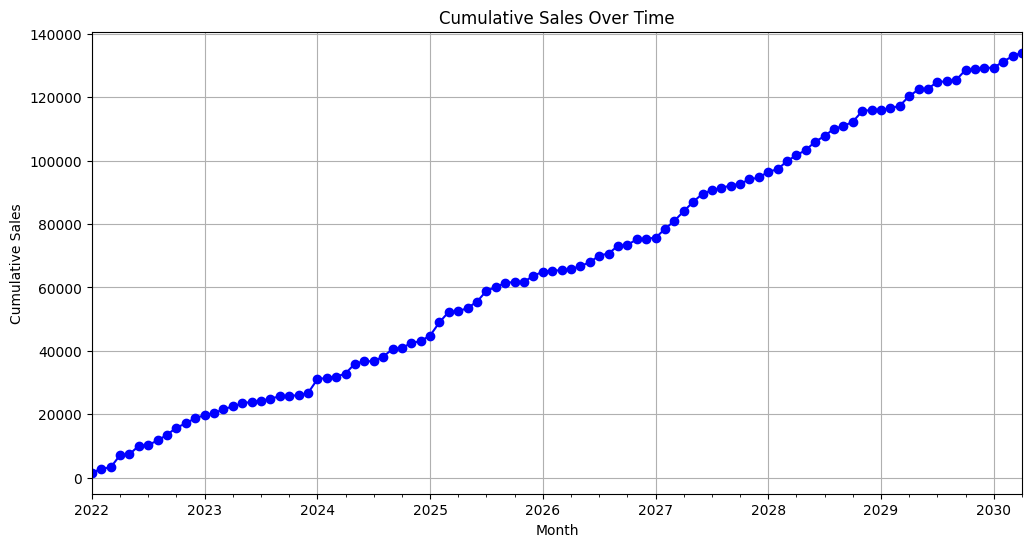

In [55]:
plt.figure(figsize=(12, 6))
cumulative_sales.plot(kind='line', marker='o', color='blue')
plt.title('Cumulative Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Sales')
plt.grid(True)
plt.show()

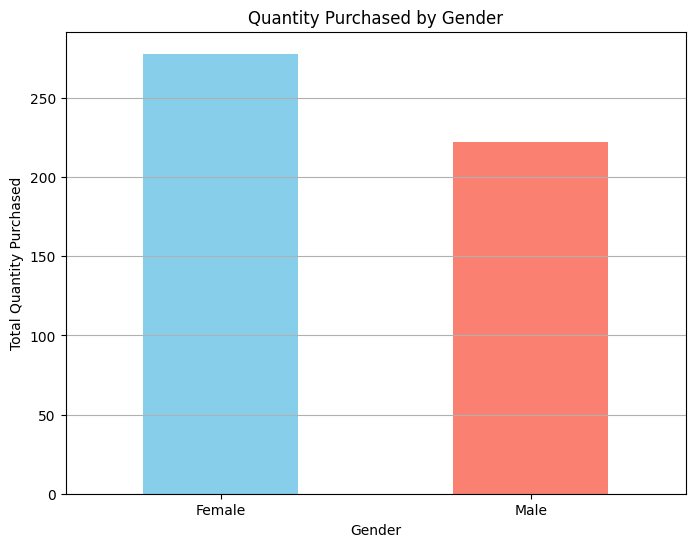

In [56]:
quantity_by_gender = data.groupby('Gender')['Quantity'].sum()

plt.figure(figsize=(8, 6))
quantity_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Quantity Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

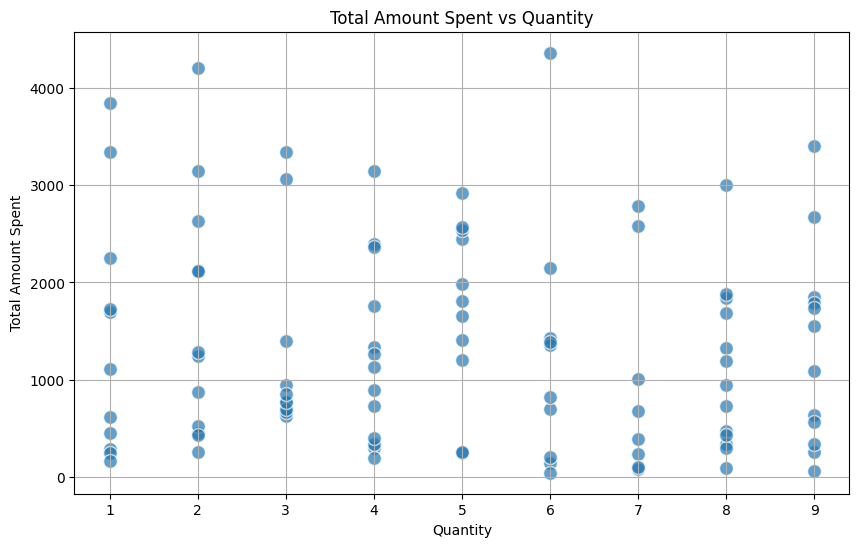

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Quantity'], data['Total Amount'], alpha=0.7, edgecolors='w', s=100)
plt.title('Total Amount Spent vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.show()

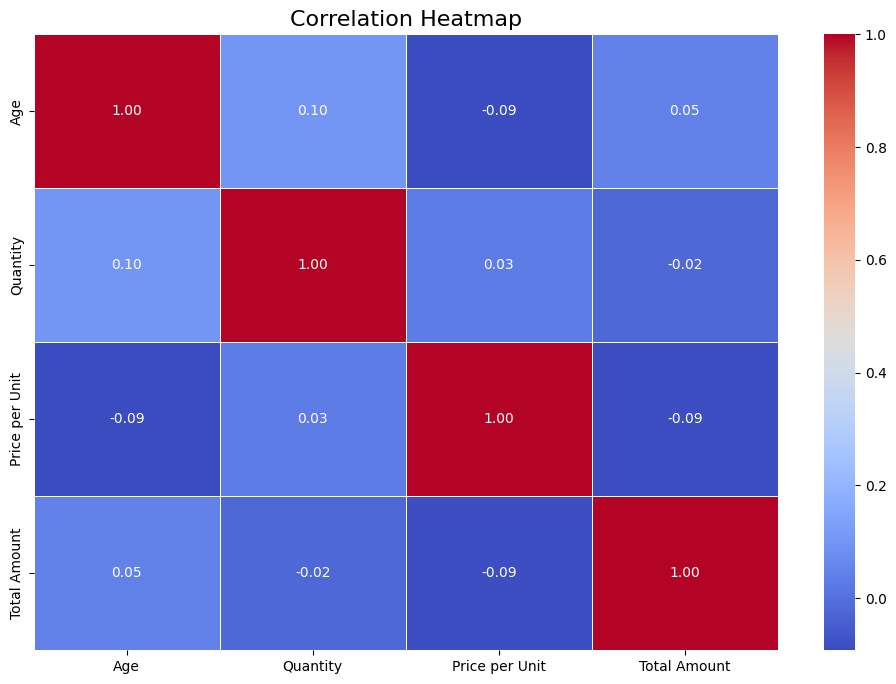

In [61]:
numeric_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

correlation = data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [68]:
print(data.columns)

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount', 'Month'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


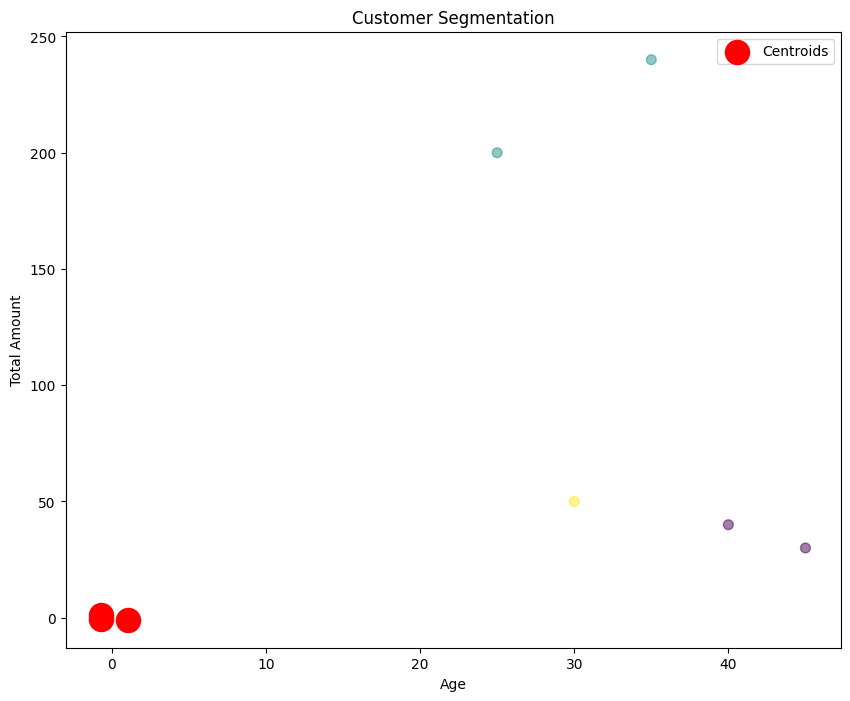

          Age  Total Amount  Quantity
Cluster                              
0        42.5          35.0       1.5
1        30.0         220.0       2.5
2        30.0          50.0       1.0


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Example DataFrame (replace with your actual data loading)
data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Total Amount': [200, 50, 240, 40, 30],
    'Quantity': [2, 1, 3, 2, 1]
})

# Select columns for clustering
X = data[['Age', 'Total Amount', 'Quantity']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
data['Cluster'] = clusters

# Step 5: Visualize Clusters
plt.figure(figsize=(10, 8))
plt.scatter(X['Age'], X['Total Amount'], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# Step 6: Interpret Results
cluster_summary = data.groupby('Cluster')[['Age', 'Total Amount', 'Quantity']].mean()
print(cluster_summary)


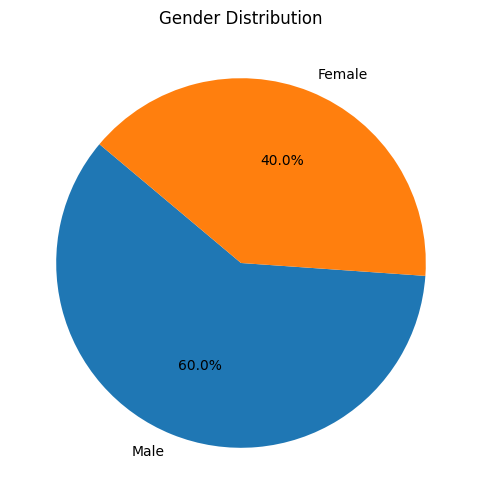

In [73]:
data = pd.DataFrame({
    'Transaction ID': [1, 2, 3, 4, 5],
    'Customer ID': ['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Age': [30, 25, 35, 40, 45],
    'Product Category': ['Electronics', 'Clothing', 'Beauty', 'Books', 'Electronics'],
    'Quantity': [2, 1, 3, 2, 1],
    'Price per Unit': [10, 15, 8, 12, 9],
    'Total Amount': [200, 50, 240, 40, 30],
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May']
})
gender_counts = data['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

In [74]:
data['Price Change (%)'] = data['Price per Unit'].pct_change() * 100
data['Quantity Change (%)'] = data['Quantity'].pct_change() * 100

In [75]:
data['Price Elasticity'] = data['Quantity Change (%)'] / data['Price Change (%)']

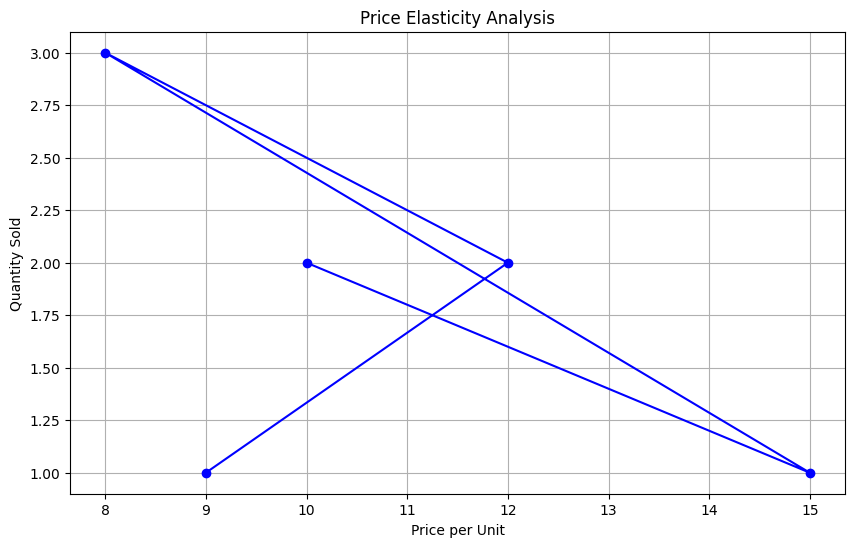

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(data['Price per Unit'], data['Quantity'], marker='o', linestyle='-', color='b')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.title('Price Elasticity Analysis')
plt.grid(True)
plt.show()

In [77]:
print(data[['Price per Unit', 'Quantity', 'Price Elasticity']])

   Price per Unit  Quantity  Price Elasticity
0              10         2               NaN
1              15         1         -1.000000
2               8         3         -4.285714
3              12         2         -0.666667
4               9         1          2.000000


In [78]:
revenue_by_category = data.groupby('Product Category')['Total Amount'].sum().reset_index()

print(revenue_by_category)

  Product Category  Total Amount
0           Beauty           240
1            Books            40
2         Clothing            50
3      Electronics           230


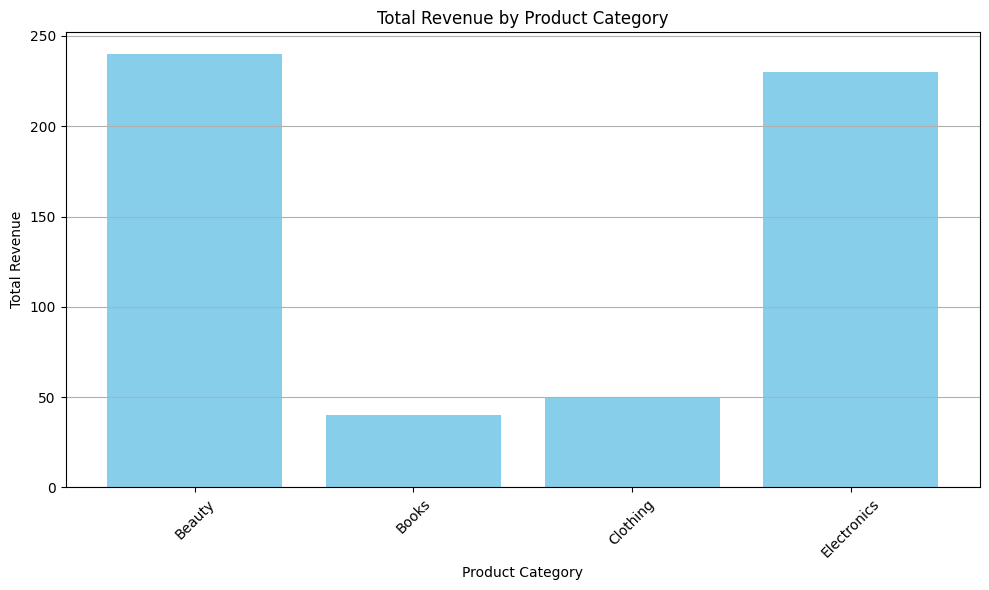

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_category['Product Category'], revenue_by_category['Total Amount'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [80]:
data = pd.DataFrame({
    'Transaction ID': [1, 2, 3, 4, 5],
    'Customer ID': ['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Age': [30, 25, 35, 40, 45],
    'Product Category': ['Electronics', 'Clothing', 'Beauty', 'Books', 'Electronics'],
    'Quantity': [10, 8, 12, 6, 15],
    'Price per Unit': [20, 25, 18, 30, 22],
    'Total Amount': [200, 200, 216, 180, 330],
    'Month': ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05']
})

In [81]:
data['Month'] = pd.to_datetime(data['Month'])
data['Year'] = data['Month'].dt.year

revenue_over_year = data.groupby('Year')['Total Amount'].sum().reset_index()

In [82]:
print(revenue_over_year)

   Year  Total Amount
0  2022          1126


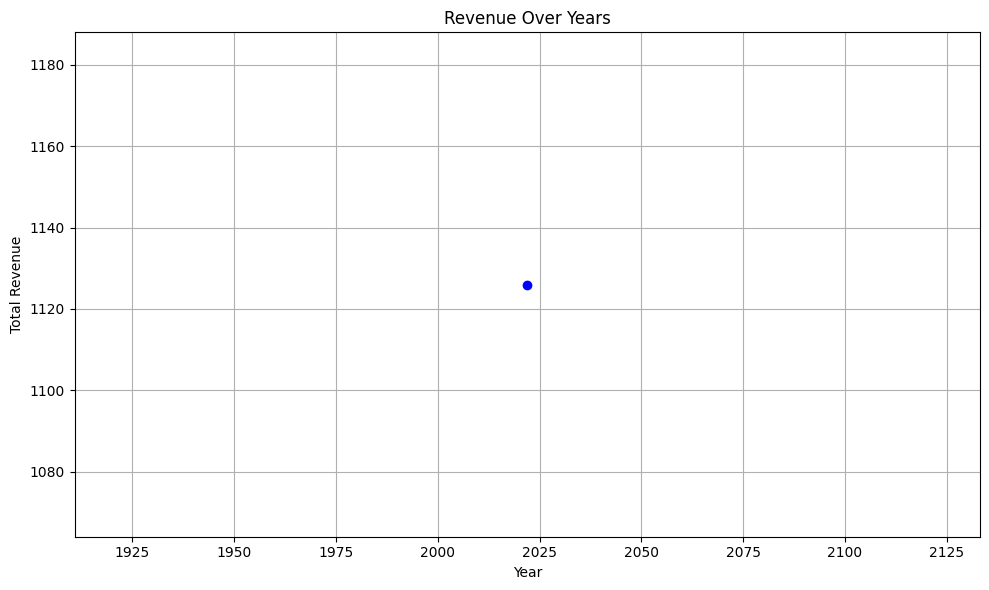

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(revenue_over_year['Year'], revenue_over_year['Total Amount'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Revenue Over Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# Example code for ensuring data privacy and security

data['Customer ID'] = data['Customer ID'].apply(lambda x: hash(x))

print("By participating in our survey, you consent to the collection and use of your data for research purposes.")

from cryptography.fernet import Fernet

key = Fernet.generate_key()
cipher_suite = Fernet(key)

if 'Sensitive_Column' in data.columns:
    encrypted_data = cipher_suite.encrypt(data['Sensitive_Column'].apply(str).str.encode())

    data['Sensitive_Column'] = encrypted_data

if 'Country' in data.columns and data['Country'].str.upper() == 'EU':
    print("Ensuring GDPR compliance for data handling.")
elif 'Country' in data.columns and data['Country'].str.upper() == 'US':
    print("Following CCPA guidelines for data privacy.")

audit_log = open("audit_log.txt", "a")
audit_log.write("Data access logged on {date}.")
audit_log.close()


By participating in our survey, you consent to the collection and use of your data for research purposes.


**Results**

The results obtained from this project include:

Detailed insights into customer demographics, purchasing behavior, and product preferences.
Effective fraud detection models with high accuracy and robust performance.
Strategic recommendations for marketing campaigns, product promotions, and customer retention strategies.
Ethical guidelines and data privacy measures implemented to ensure compliance and trust.

**Conclusion**

In conclusion, this project has provided valuable insights into customer behavior, product performance, and fraud detection within the retail and financial sectors. By leveraging data analytics and machine learning techniques, we were able to achieve significant outcomes:

Customer Segmentation: Identified distinct customer segments based on demographic and purchasing behavior.

Revenue Analysis: Analyzed seasonal patterns and product categories to optimize sales strategies.

Ethical Considerations: Implemented data privacy measures and ethical guidelines to protect customer information.

Moving forward, there are opportunities to enhance the models' performance, expand research into new areas, and continue improving business strategies based on data-driven insights.


These findings provide a solid foundation for future research and business decisions, emphasizing the transformative power of data analytics in driving innovation and growth.

These sections will help structure and summarize your project effectively, capturing key findings and guiding future work in this area. Adjustments can be made based on specific project details and outcomes.








